# Dunn Index

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
def dunn_index_score(X,y_pred):
    clusters = []
    diameters = []
    centroids = []
    k = np.unique(y_pred).shape[0]
    for i in range(k):
        C_i = X[y_pred==i]
        if(len(C_i > 0)):
            clusters.append(C_i)
    for cluster in clusters:
        distances = metrics.pairwise_distances(cluster,cluster)
        diameters.append(np.max(distances))
        centroids.append(np.mean(cluster, axis=0))
    max_diameter = np.max(diameters)
    if (len(centroids) > 1):
        intercluster_distances = metrics.pairwise_distances(centroids,centroids)
        min_intercluster_distance = np.min(intercluster_distances[intercluster_distances > 0])
    else:
        min_intercluster_distance = 0
    dunn_index = min_intercluster_distance/max_diameter
    return dunn_index

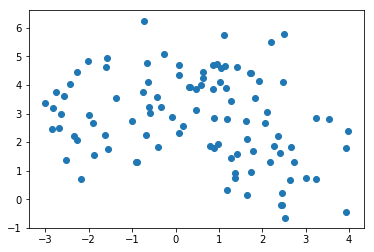

In [3]:
x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1)
plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.brg)
plt.show()

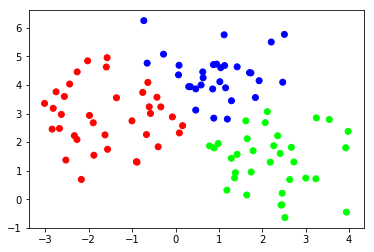

0.6715707280477875


In [4]:
estimator = KMeans(n_clusters=3)
y_pred = estimator.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()

print(dunn_index_score(x,y_pred))

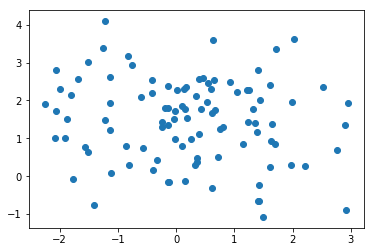

0.4364882165788718


In [5]:
x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1, center_box=(-5,5))
plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.brg)
plt.show()

estimator = KMeans(n_clusters=3)
y_pred = estimator.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()

print(dunn_index_score(x,y_pred))

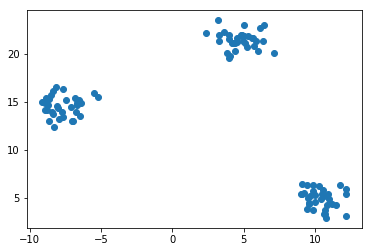

In [6]:
x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1, center_box=(-50,50))
plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.brg)
plt.show()

In [7]:
estimator = KMeans(n_clusters=3)
y_pred = estimator.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()

print(dunn_index_score(x,y_pred))

2.7032917390714526


In [8]:
x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1, center_box=(-50,50))
y_pred = np.random.choice(np.arange(y.shape[0]),size=y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(dunn_index_score(x,y_pred))

0.008522543702915872


In [9]:
y_pred = np.zeros(y.shape).astype(int)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(dunn_index_score(x,y_pred))

0.0


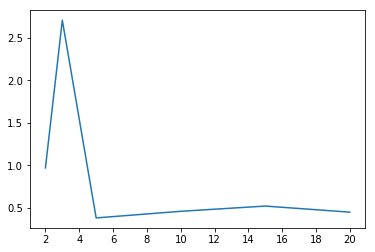

In [10]:
scores = []
k_values = [2,3,5,10,15,20]
for k in k_values:
    estimator = KMeans(n_clusters=k)
    y_pred = estimator.fit_predict(x)
    scores.append(dunn_index_score(x,y_pred))
plt.xticks(np.arange(0,22,2))
plt.plot(k_values,scores)
plt.show()